In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import os
import json
from tensorflow.keras.models import load_model
from tensorflow_hub import KerasLayer
import matplotlib.pyplot as plt
from random import randint
import cv2
import numpy as np
import shutil
from sklearn.metrics import confusion_matrix,classification_report,f1_score,precision_score,recall_score
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

In [3]:
!unzip "/content/drive/MyDrive/datasetFoodImage/images.zip" -d "/content/sample_data/data"

Streaming output truncated to the last 5000 lines.
  inflating: /content/sample_data/data/images/tacos/1023154.jpg  
  inflating: /content/sample_data/data/images/tacos/1023947.jpg  
  inflating: /content/sample_data/data/images/tacos/1026681.jpg  
  inflating: /content/sample_data/data/images/tacos/1030289.jpg  
  inflating: /content/sample_data/data/images/tacos/1033196.jpg  
  inflating: /content/sample_data/data/images/tacos/1036030.jpg  
  inflating: /content/sample_data/data/images/tacos/1042175.jpg  
  inflating: /content/sample_data/data/images/tacos/1044043.jpg  
  inflating: /content/sample_data/data/images/tacos/1058697.jpg  
  inflating: /content/sample_data/data/images/tacos/1059239.jpg  
  inflating: /content/sample_data/data/images/tacos/1059326.jpg  
  inflating: /content/sample_data/data/images/tacos/1066762.jpg  
  inflating: /content/sample_data/data/images/tacos/1070967.jpg  
  inflating: /content/sample_data/data/images/tacos/1073468.jpg  
  inflating: /content/sam

In [4]:
path = '/content/sample_data/data/images/fu yung hai'
for item in os.listdir(path):
    if item.endswith(".txt"):
        pathFile = os.path.join(path,item)
        os.remove(pathFile)

In [5]:
def getRandomData(path,labelPath):
  imagesArray = np.zeros((5*108,250,250,3))
  ytrue = []
  counters = 0
  with open(labelPath) as f:
    labels = json.load(f)
  for folderName in os.listdir(path):
    folderPath = os.path.join(path,folderName)
    folderInside = os.listdir(folderPath)
    length = len(folderInside)
    randomNumber = [randint(0,length-1) for i in range(5)]
    for i in randomNumber:
      ytrue.append(labels[folderName])
      filePath = os.path.join(folderPath,folderInside[i])
      images = cv2.resize(cv2.imread(filePath),(250,250))
      imagesArray[counters] = images
      counters = counters+1
  return imagesArray/255, ytrue

In [35]:
def getRandomData100(path,labelPath):
  imagesArray = np.zeros((5*108,100,100,3))
  ytrue = []
  counters = 0
  with open(labelPath) as f:
    labels = json.load(f)
  for folderName in os.listdir(path):
    folderPath = os.path.join(path,folderName)
    folderInside = os.listdir(folderPath)
    length = len(folderInside)
    randomNumber = [randint(0,length-1) for i in range(5)]
    for i in randomNumber:
      ytrue.append(labels[folderName])
      filePath = os.path.join(folderPath,folderInside[i])
      images = cv2.resize(cv2.imread(filePath),(100,100))
      imagesArray[counters] = images
      counters = counters+1
  return imagesArray/255, ytrue

In [49]:
def confusionMatrix(ytrue, ypred):
  fig, ax = plt.subplots(figsize=(40,40)) 
  confMat = confusion_matrix(ytrue,ypred)
  sns.heatmap(confMat, ax=ax)

In [8]:
def predict(model, data):
  ypred = model.predict(data)
  ypred = np.argmax(ypred,axis=1)
  return ypred

In [9]:
def getModel(name):
  path = os.path.join('/content/drive/MyDrive/models',name)
  model = load_model(path,custom_objects={'KerasLayer':KerasLayer})
  return model

In [10]:
def plotHistory(name):
  path = os.path.join('/content/drive/MyDrive/models',name)
  with open(path) as f:
    history = json.load(f)
  data = {i:[] for i in ['loss','accuracy','val_loss','val_accuracy']}
  for i in history:
    for j,k in i.items():
      if j in ['loss','accuracy','val_loss','val_accuracy']:
        data[j].append(k)
  fig, plot = plt.subplots(1,2, figsize=(10,7))
  keyForPlot = [['loss','val_loss'],['accuracy','val_accuracy']]
  for index,x in enumerate(keyForPlot):
    plot[index].plot(data[x[0]])
    plot[index].plot(data[x[1]])
    plot[index].set_title(x[0])
    plot[index].legend(x)

In [11]:
imagesArray, ytrue = getRandomData('/content/sample_data/data/images','/content/drive/MyDrive/models/labels.json')

In [36]:
imagesArray100, ytrue = getRandomData100('/content/sample_data/data/images','/content/drive/MyDrive/models/labels.json')

MODEL RESNET 50

In [13]:
model = getModel('Resnet50/RESNET_08_0.74.h5')

In [14]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Resnet50 (KerasLayer)       (None, 2048)              23564800  
                                                                 
 dense_6 (Dense)             (None, 108)               221292    
                                                                 
Total params: 23,786,092
Trainable params: 221,292
Non-trainable params: 23,564,800
_________________________________________________________________


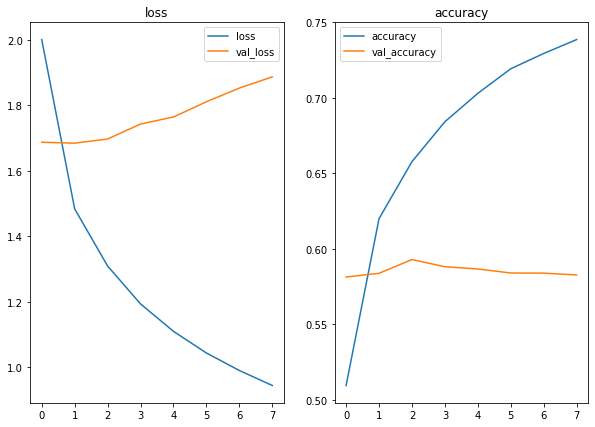

In [15]:
plotHistory('Resnet50/trainingHistory.json') 

In [16]:
ypred = predict(model,imagesArray)

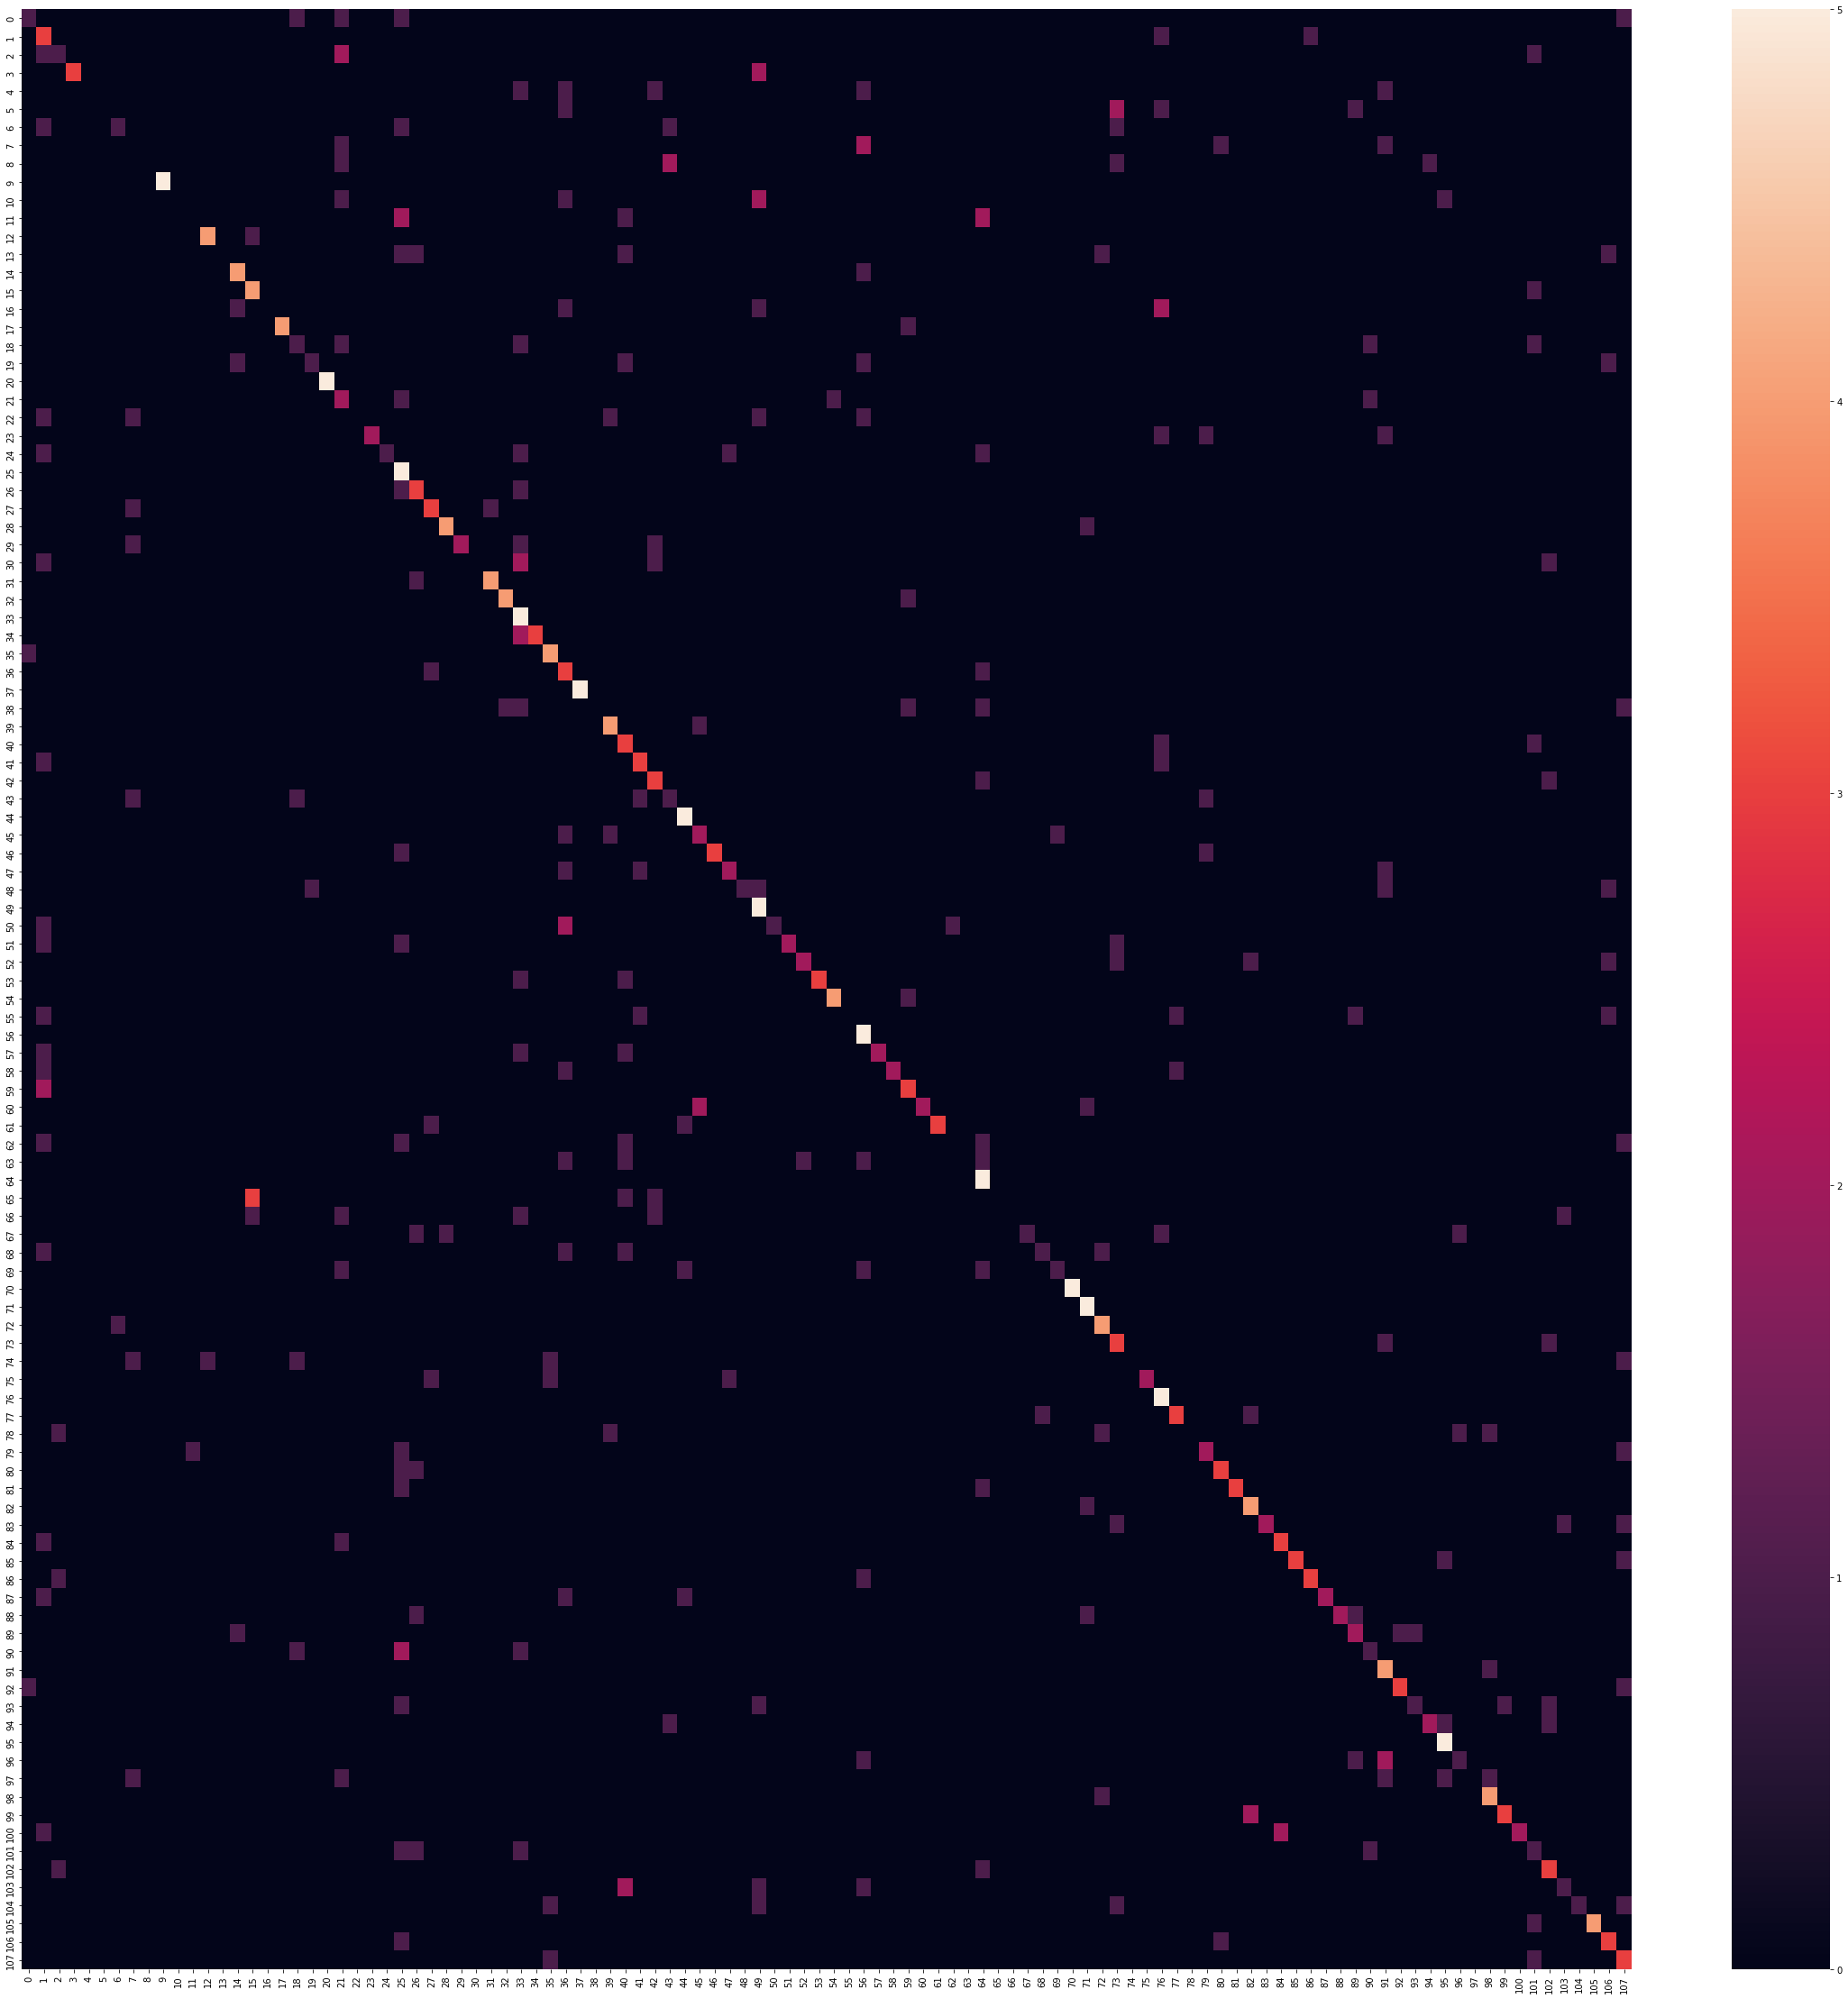

In [50]:
confusionMatrix(ytrue,ypred)

MODEL EFFICIENT V2L With Augmentasi add just 1 layers for classification

In [18]:
model = getModel('EfficientNetV2LWithAugment/EffnetWithAugment_06_0.78.h5')

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 EfficientNet (KerasLayer)   (None, 1280)              117746848 
                                                                 
 dense_3 (Dense)             (None, 108)               138348    
                                                                 
Total params: 117,885,196
Trainable params: 138,348
Non-trainable params: 117,746,848
_________________________________________________________________


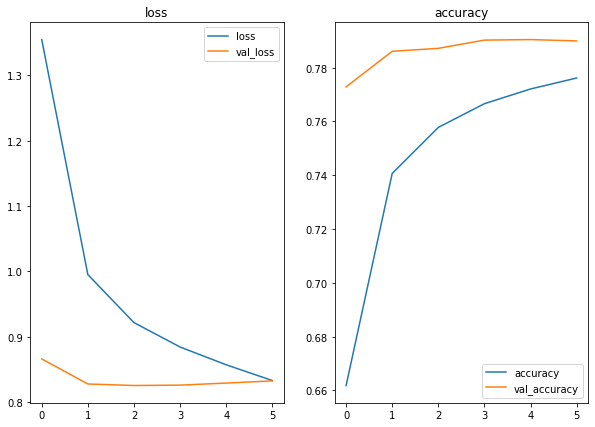

In [20]:
plotHistory('EfficientNetV2LWithAugment/trainingHistory.json')

In [21]:
ypred = predict(model,imagesArray)

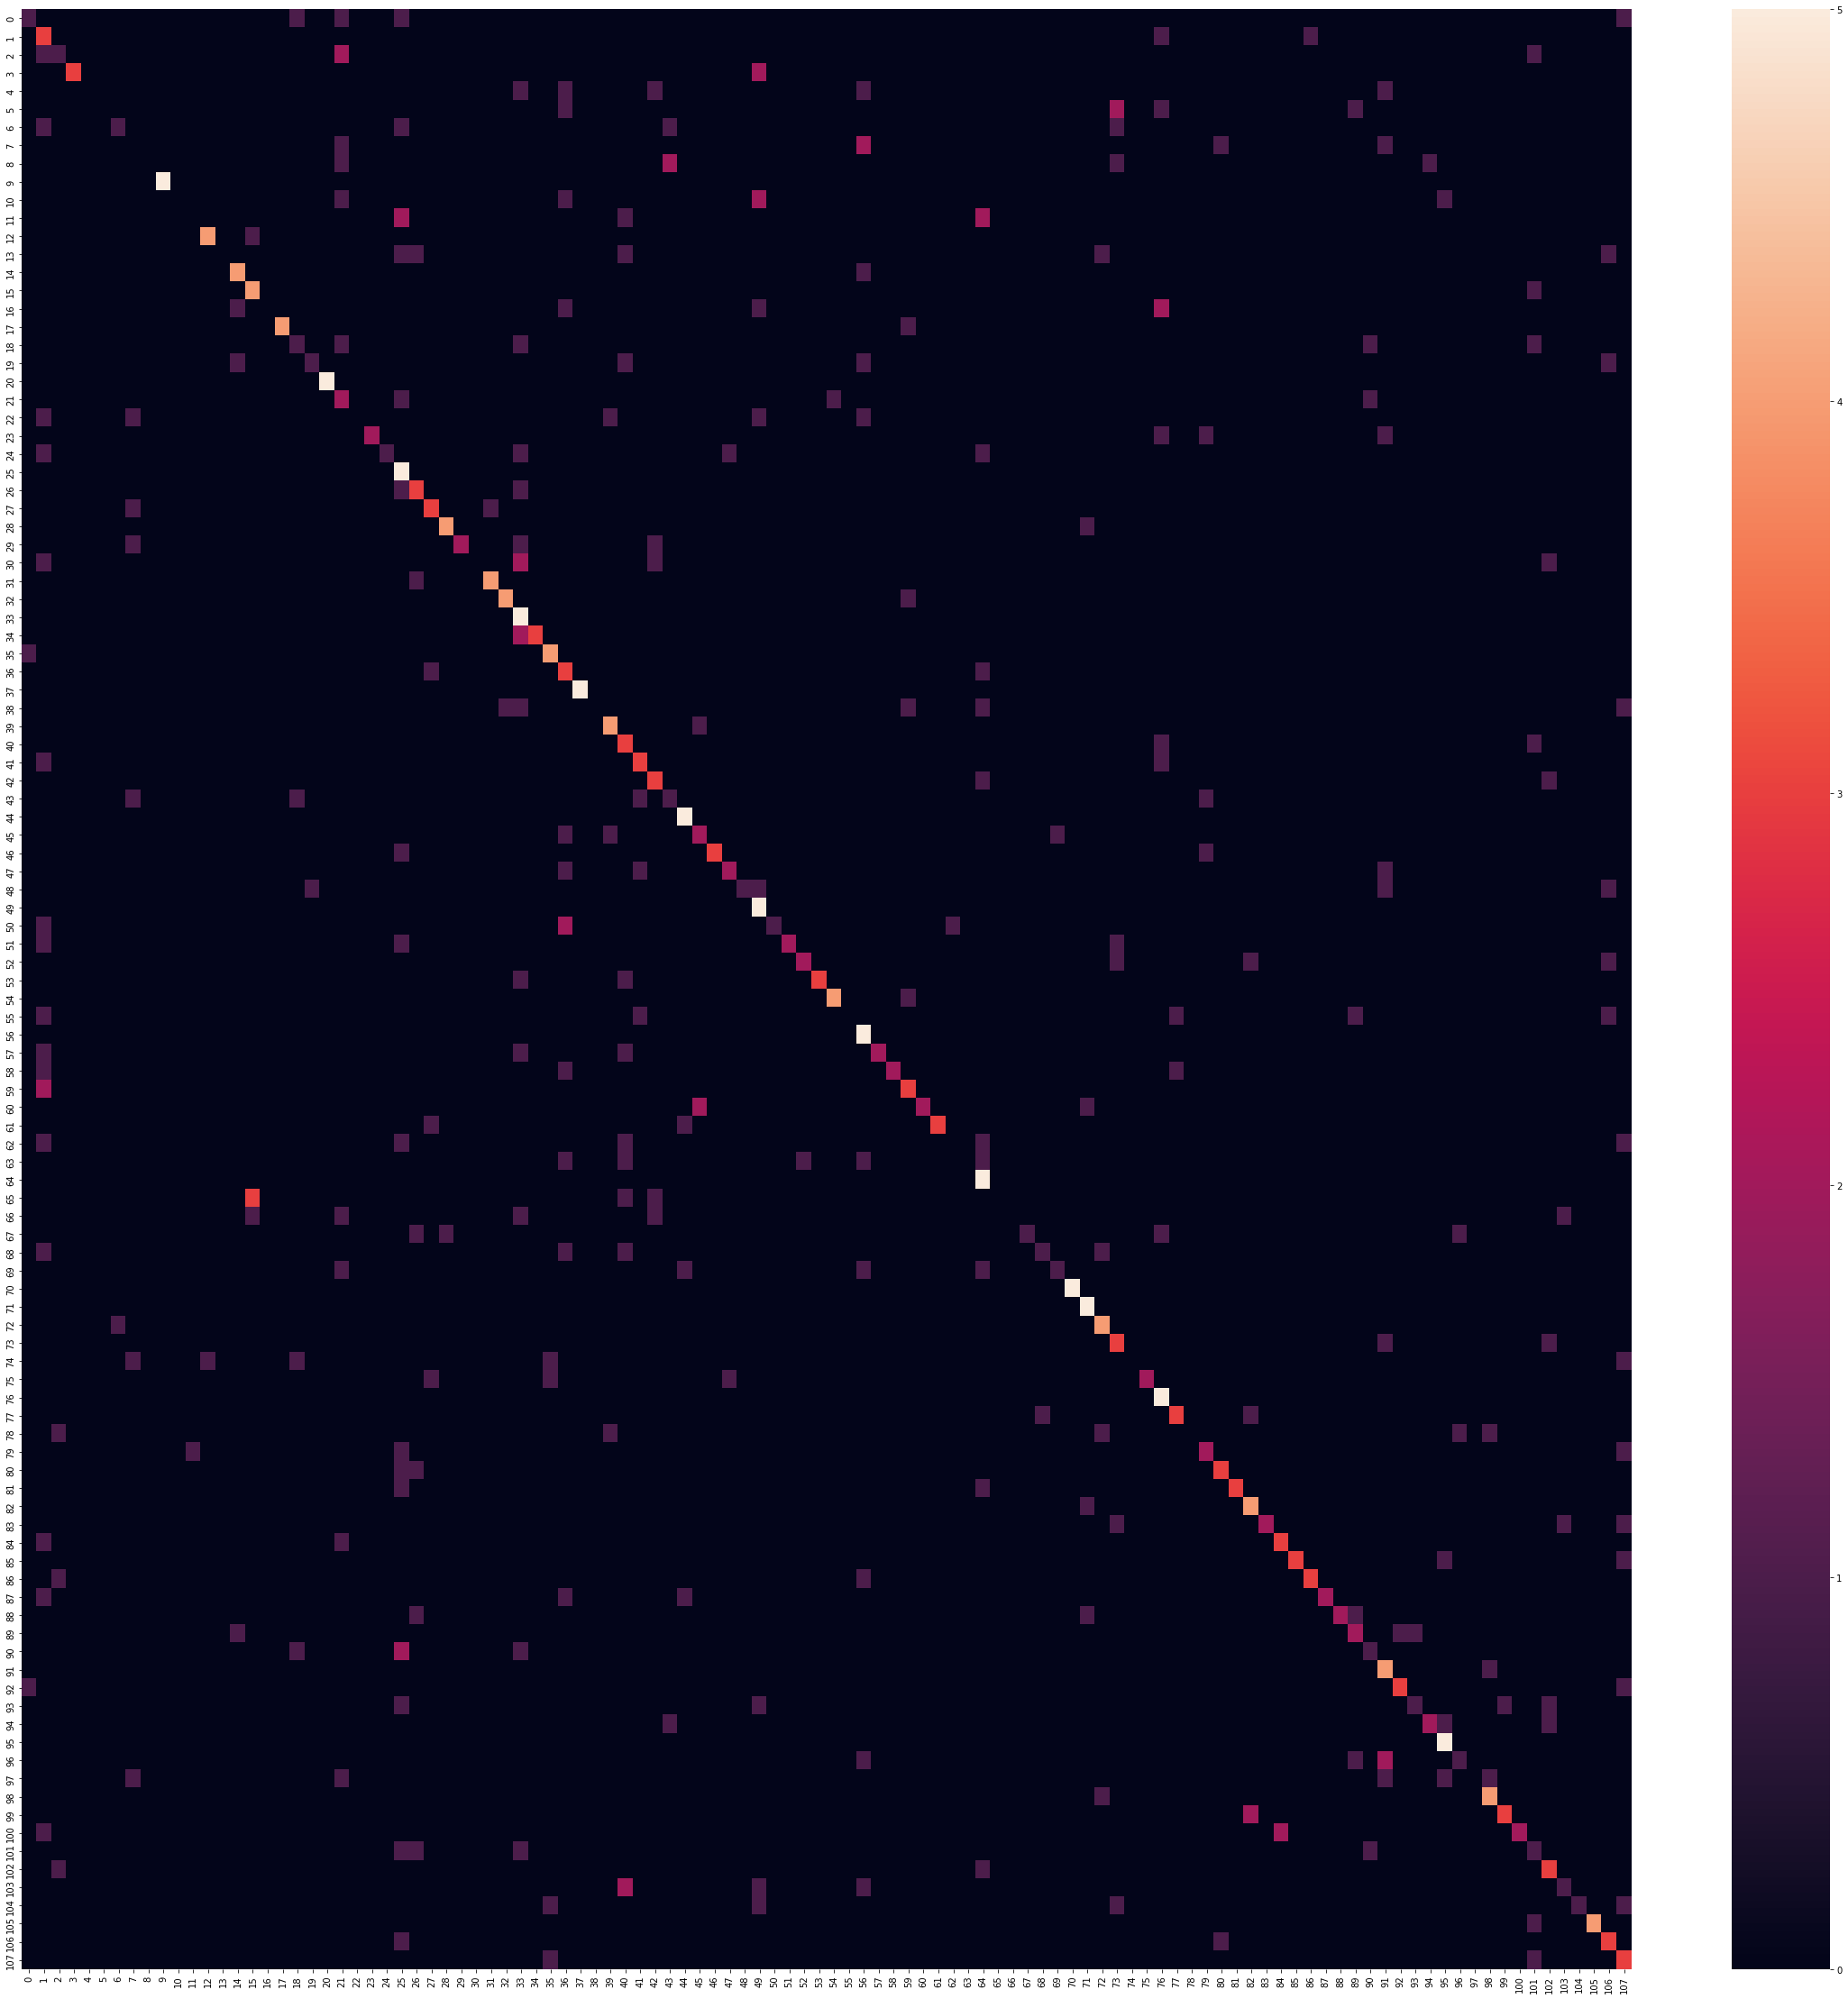

In [51]:
confusionMatrix(np.array(ytrue),ypred)

MODEL EFFICIENT V2L WITH AUGMENT Add 1 layer on first then classification layer

In [23]:
model = getModel('EfficientNetV2LWithAugmentDense+/EffnetWithAugmentDense+_18_0.66.h5')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 EfficientNet (KerasLayer)   (None, 1280)              117746848 
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 108)               27756     
                                                                 
Total params: 118,103,564
Trainable params: 356,204
Non-trainable params: 117,747,360
____________________________________

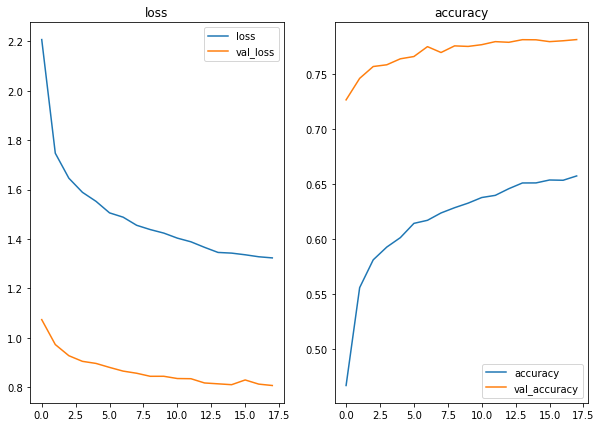

In [25]:
plotHistory('EfficientNetV2LWithAugmentDense+/trainingHistory.json')

In [26]:
ypred = predict(model,imagesArray)

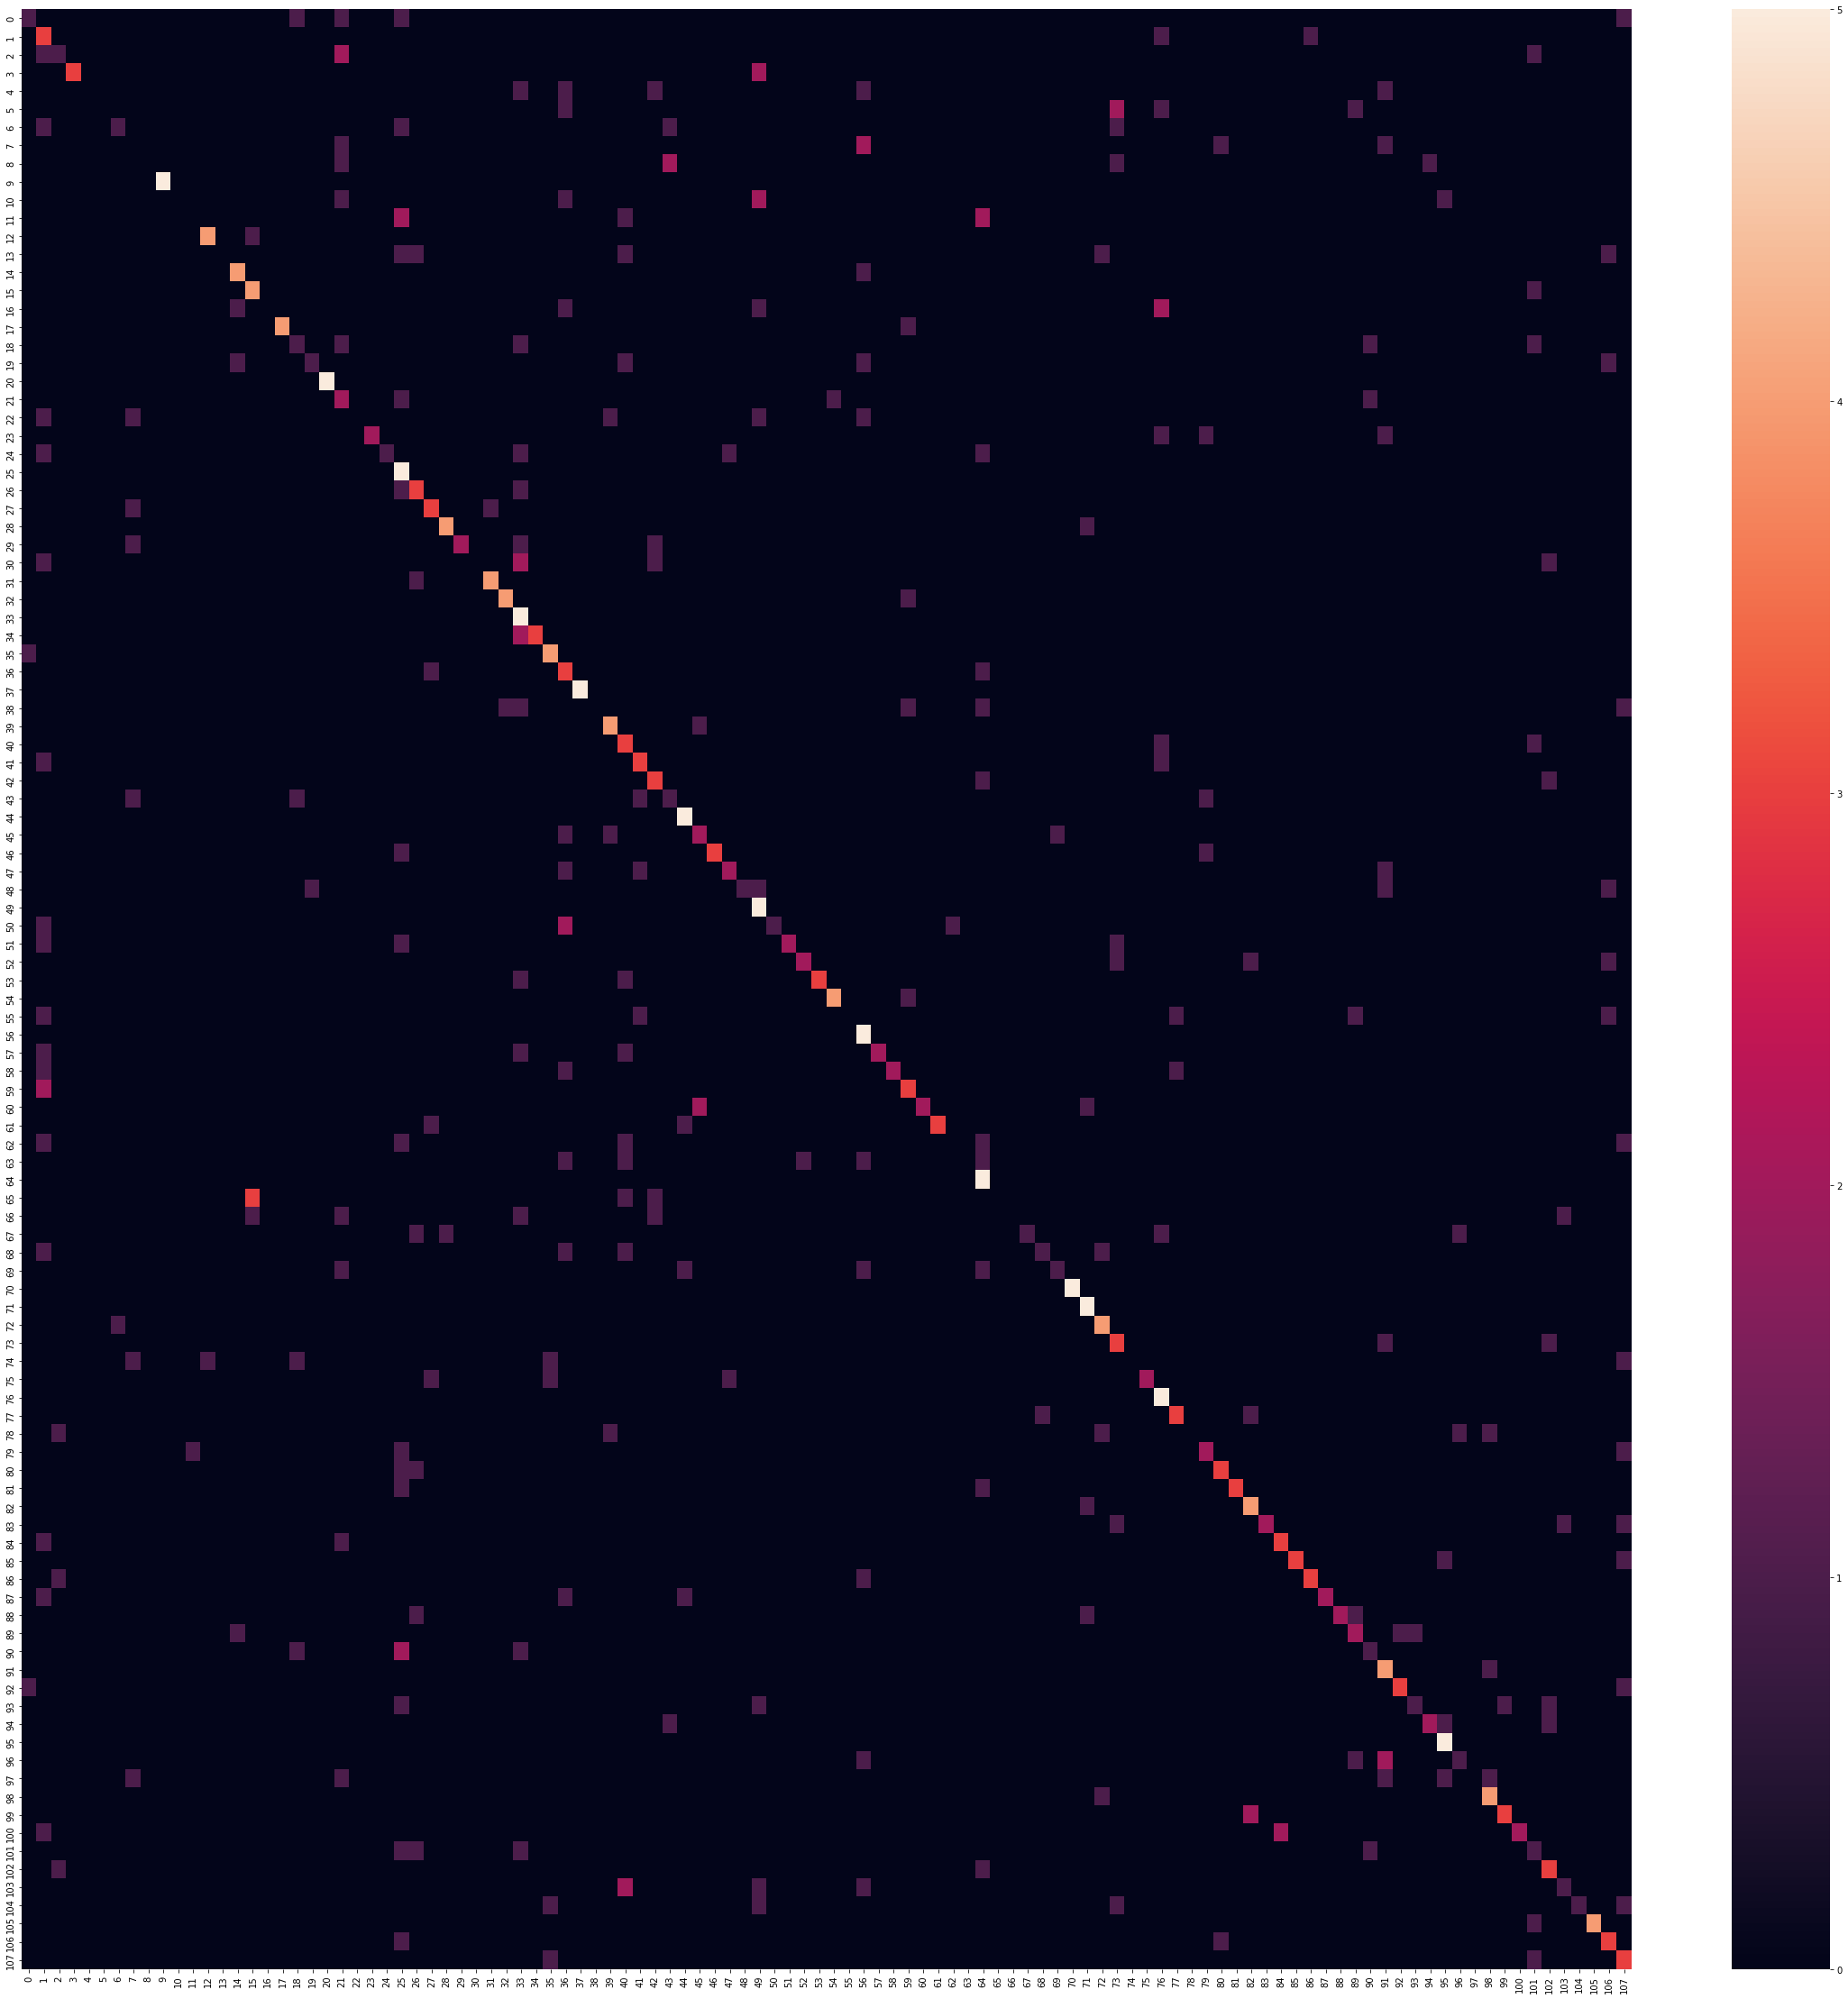

In [52]:
confusionMatrix(np.array(ytrue),ypred)

MODEL EFFICIENT V2L Fine tuning without augment

In [28]:
model = getModel('EfficientV2LTuningWithoutAugment/EffnetWithoutAug100_13_0.70.h5')

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 EfficientNet (KerasLayer)   (None, 1280)              117746848 
                                                                 
 dense_8 (Dense)             (None, 108)               138348    
                                                                 
Total params: 117,885,196
Trainable params: 117,372,620
Non-trainable params: 512,576
_________________________________________________________________


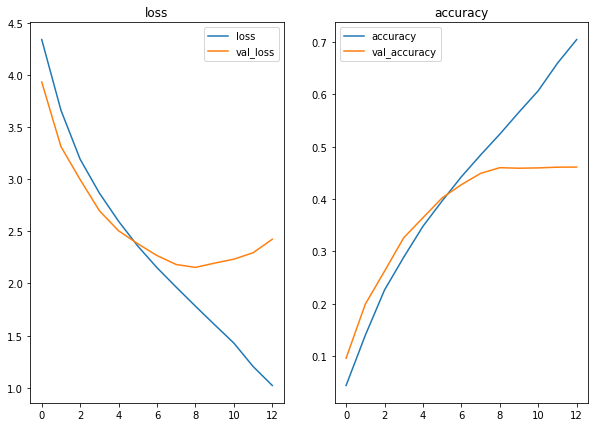

In [30]:
plotHistory('EfficientV2LTuningWithoutAugment/trainingHistory.json')

In [37]:
ypred = predict(model,imagesArray100)

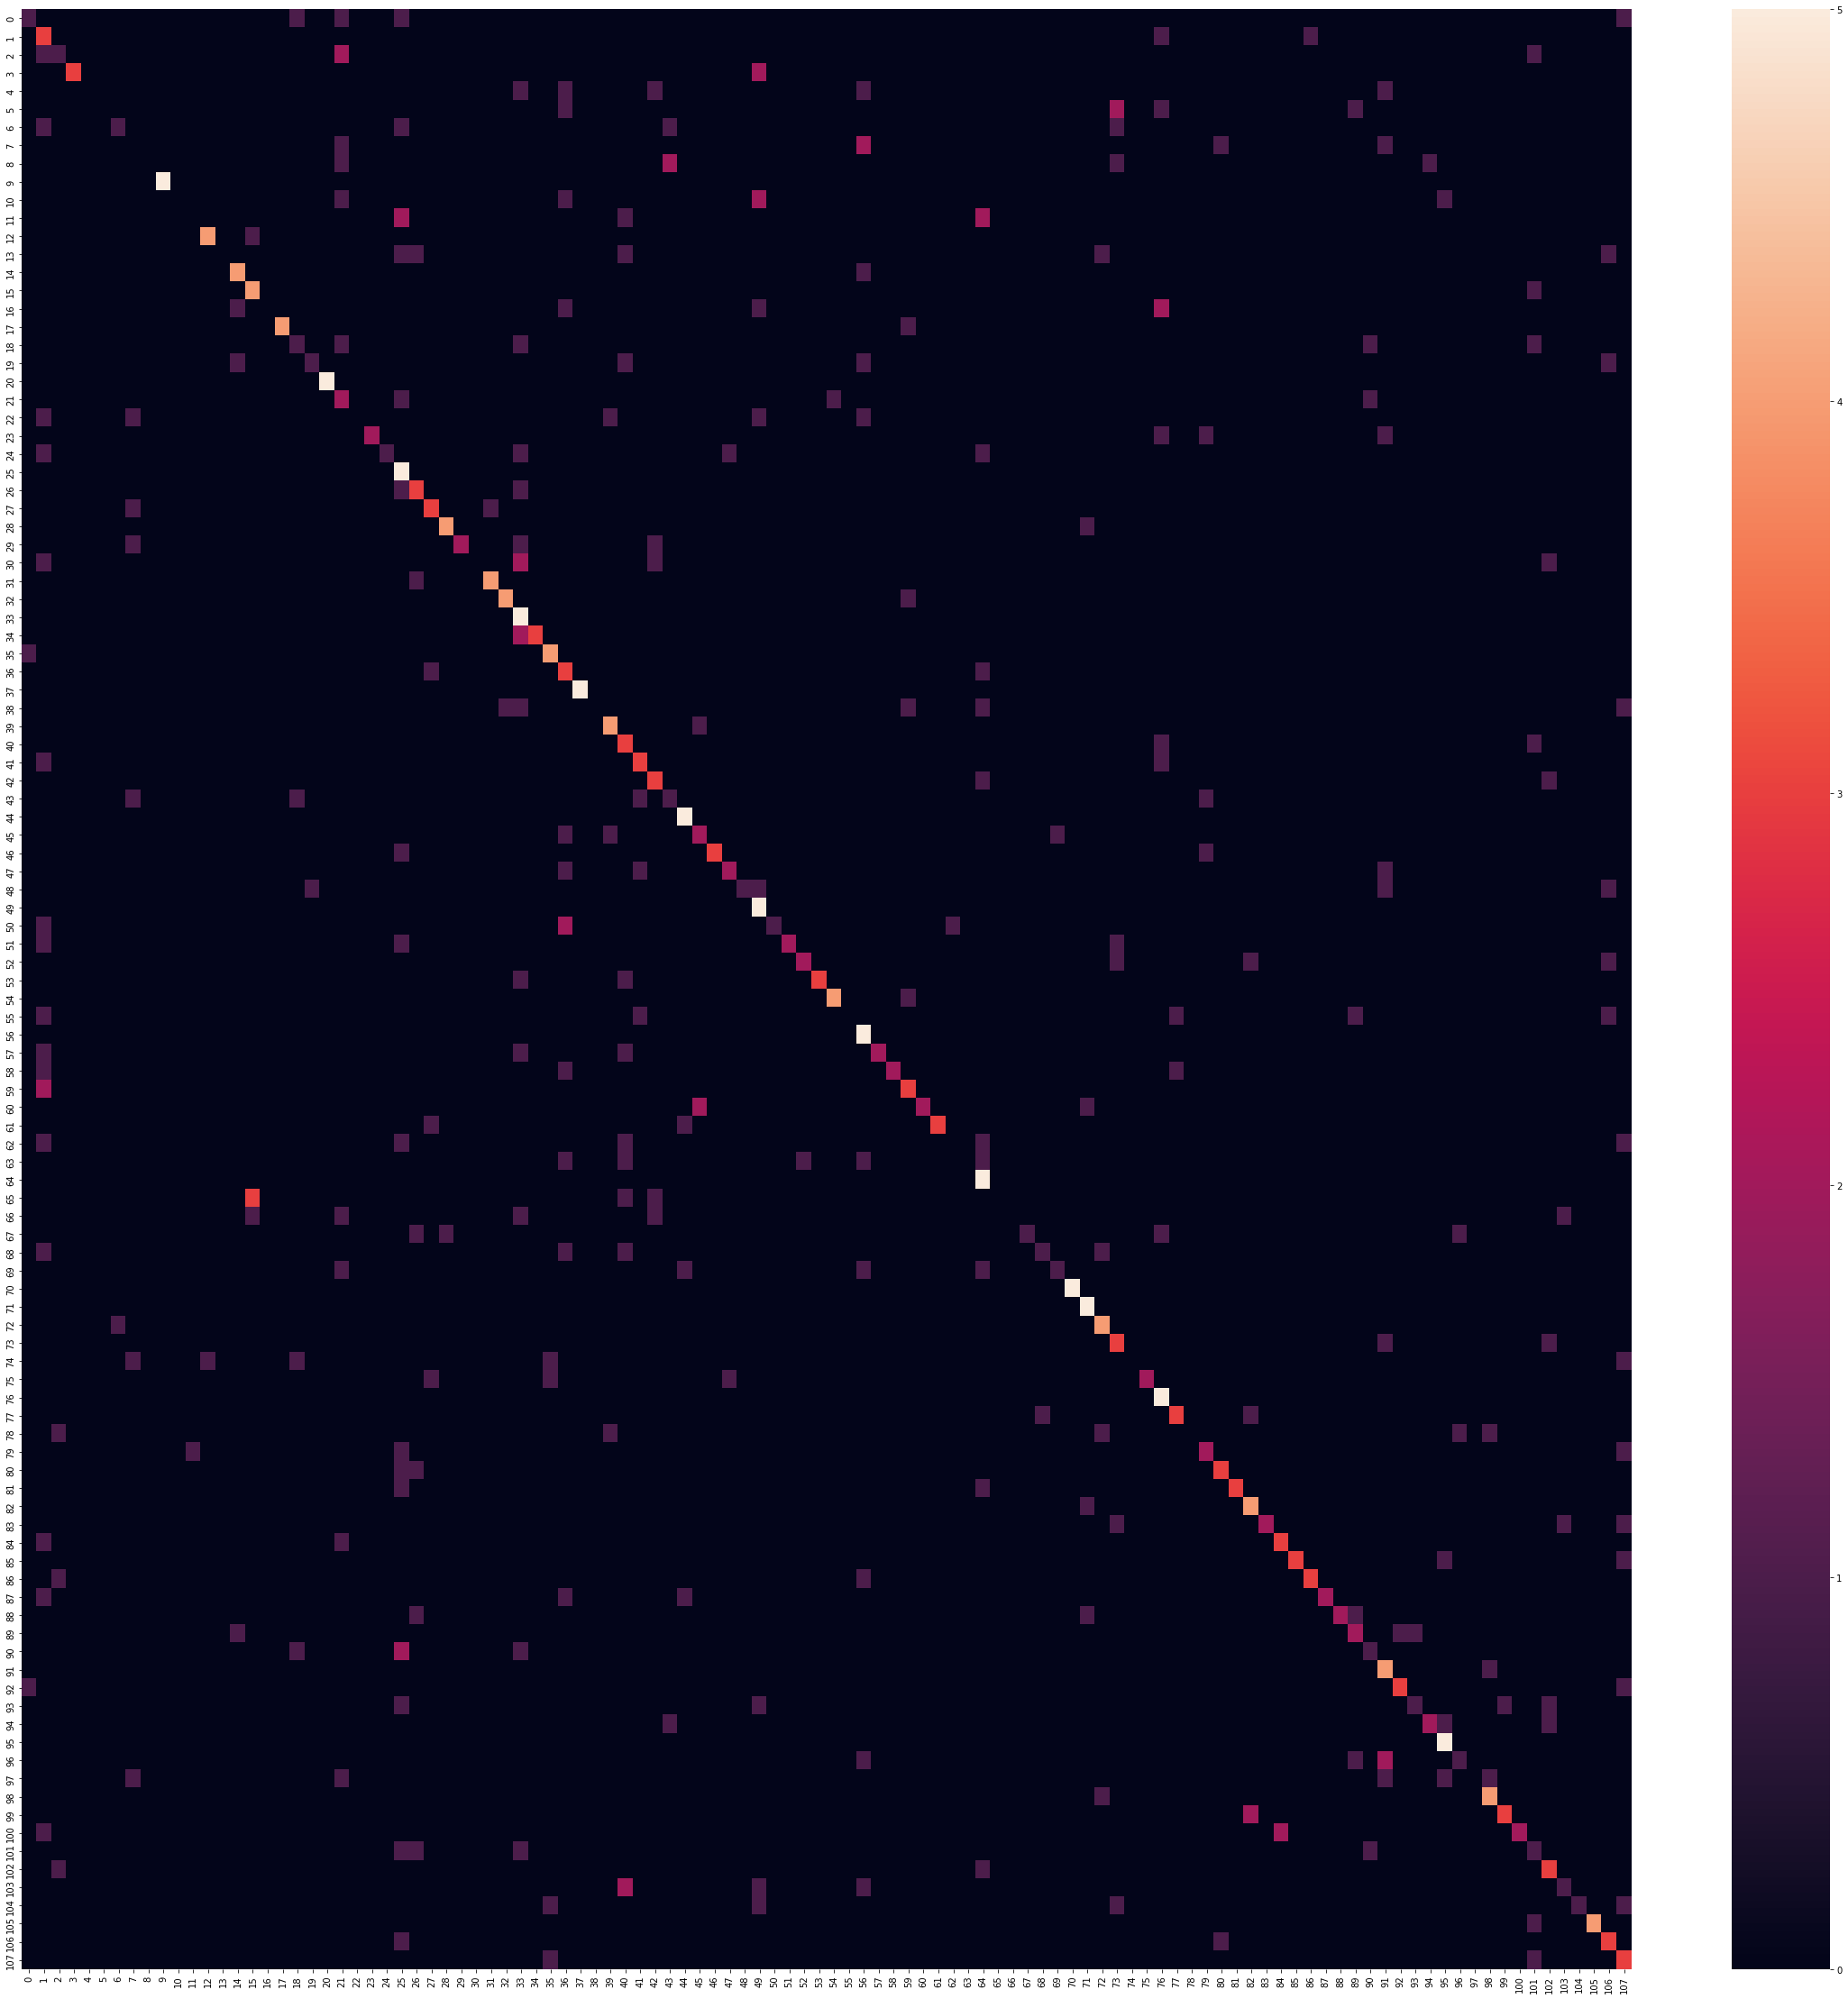

In [53]:
confusionMatrix(np.array(ytrue),ypred)

MODEL EFFICIENT V2L Fine tuning WIth Augment

In [39]:
model = getModel('EfficientnetV2LTuningAugment/EffnetWithAugment100_26_0.80.h5')

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 EfficientNet (KerasLayer)   (None, 1280)              117746848 
                                                                 
 dense_5 (Dense)             (None, 108)               138348    
                                                                 
Total params: 117,885,196
Trainable params: 117,372,620
Non-trainable params: 512,576
_________________________________________________________________


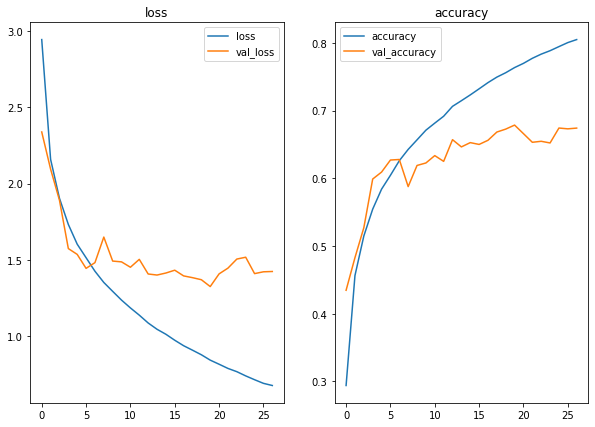

In [41]:
plotHistory('EfficientnetV2LTuningAugment/trainingHistory.json')

In [42]:
ypred = predict(model,imagesArray100)

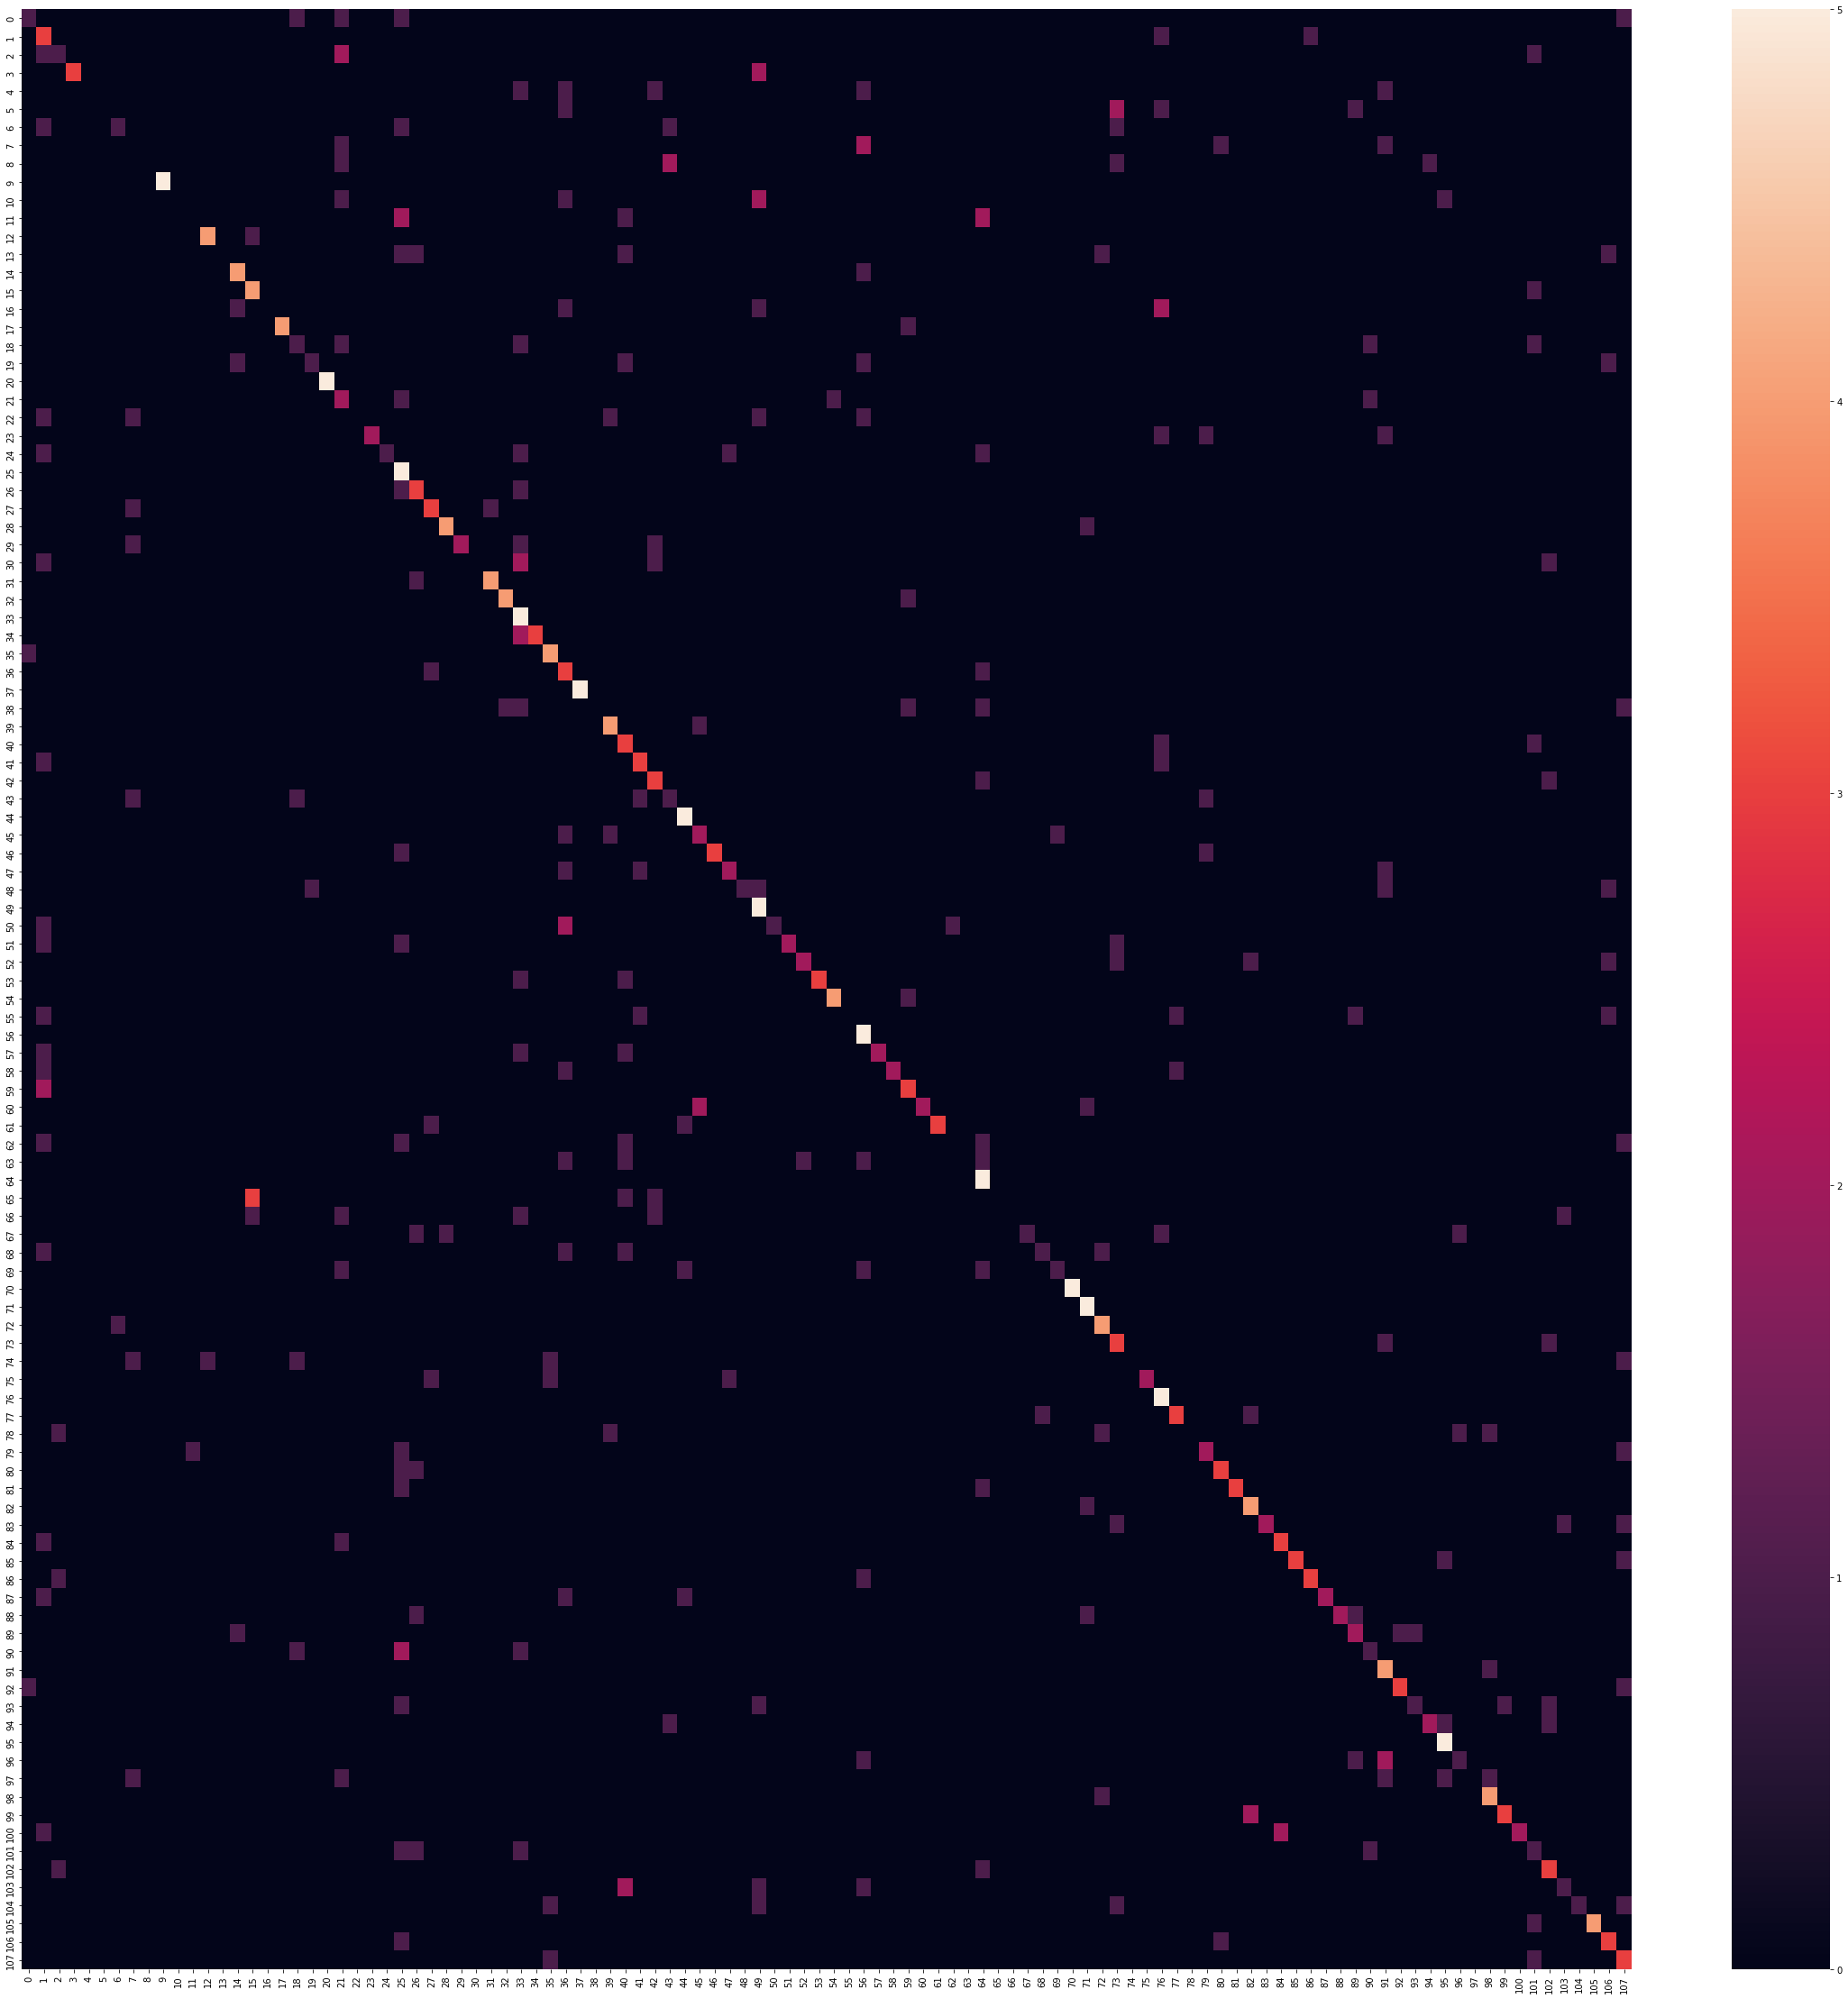

In [54]:
confusionMatrix(np.array(ytrue),ypred)

EfficnentNewV2L without augment and only use classification layer


In [44]:
model = getModel('EfficientNetV2L/Effnet_07_0.90.h5')

In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 EfficientNet (KerasLayer)   (None, 1280)              117746848 
                                                                 
 dense_4 (Dense)             (None, 108)               138348    
                                                                 
Total params: 117,885,196
Trainable params: 138,348
Non-trainable params: 117,746,848
_________________________________________________________________


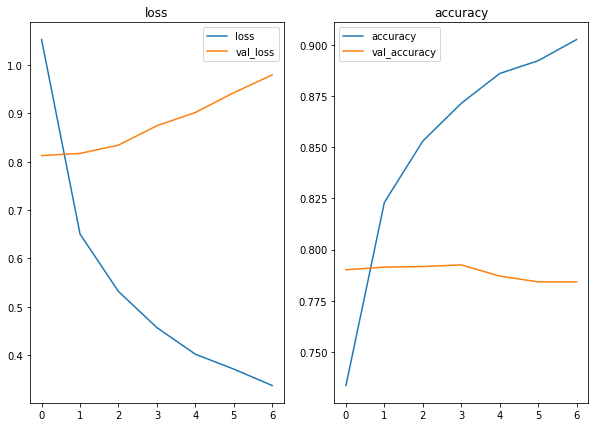

In [46]:
plotHistory('EfficientNetV2L/trainingHistory.json')

In [47]:
ypred = predict(model,imagesArray)

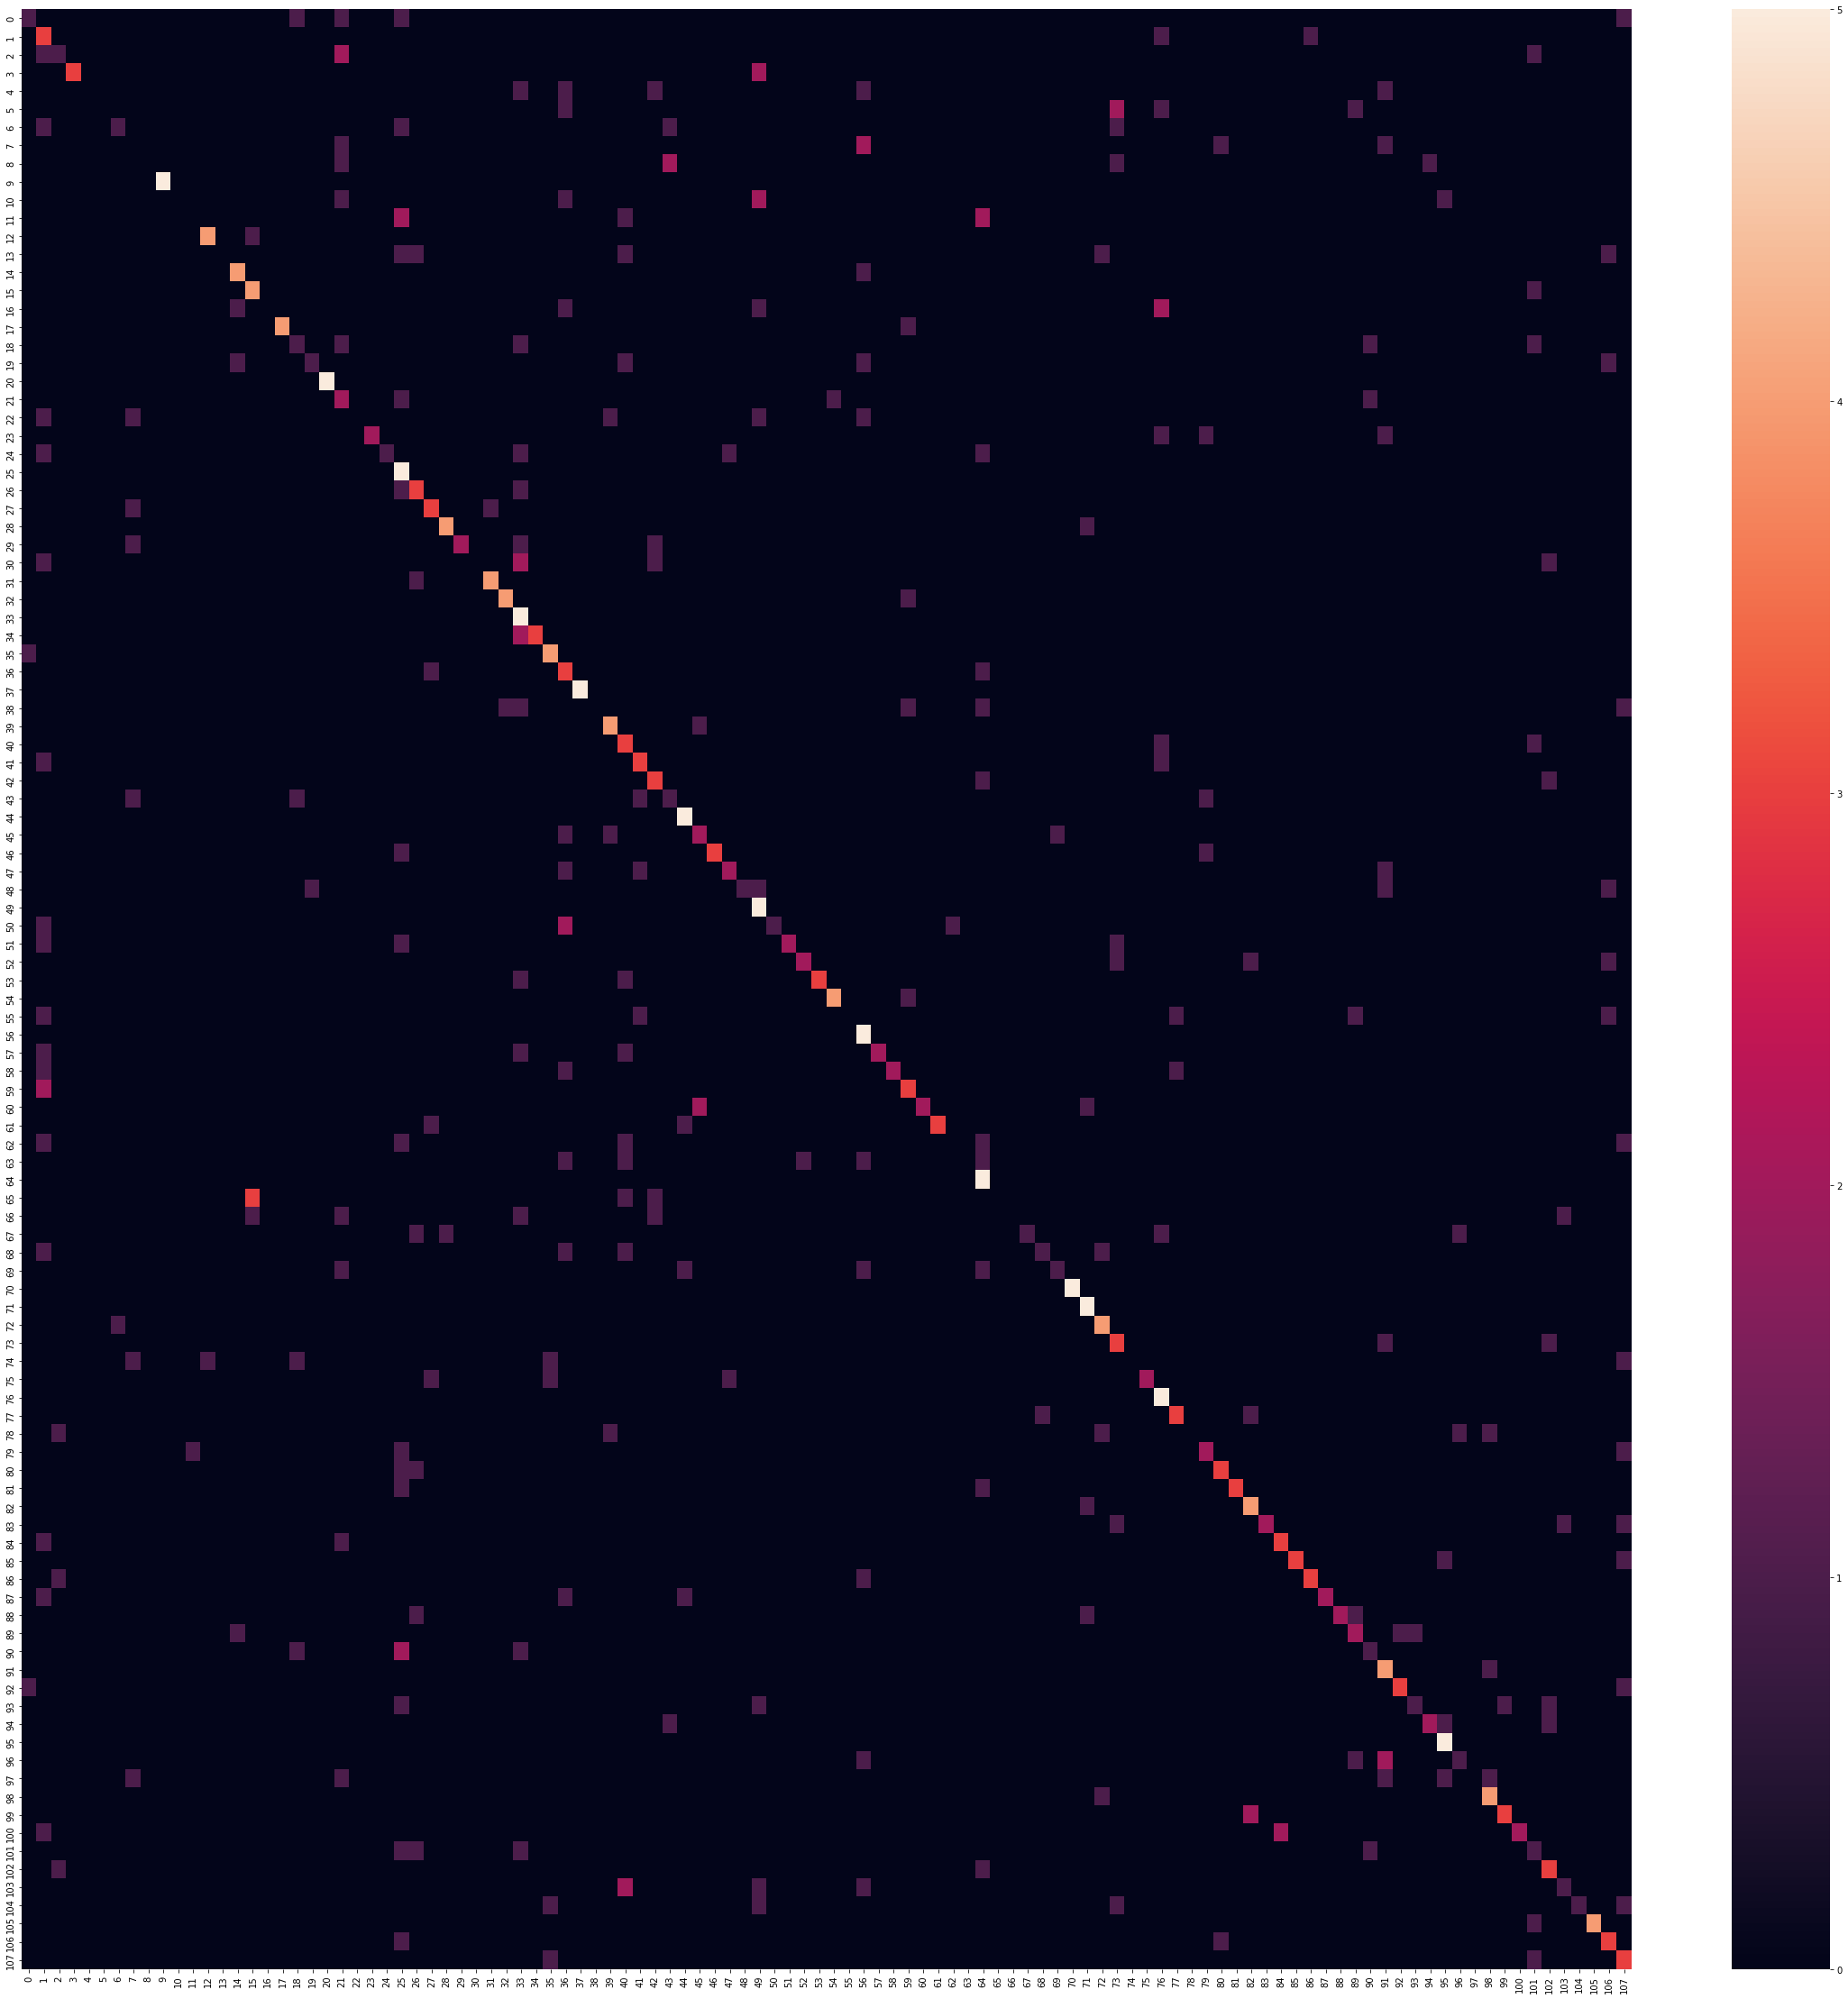

In [55]:
confusionMatrix(np.array(ytrue),ypred)

Analysis

# We use 6 kind of model in here which are:  
  ## - Resnet 50 adding classification layer in last
  ## - Efficient Net with augmentation
  ## - Efficient Net with added hidden layer in middle 
  ## - Efficient Net Tuning Without augmentation 
  ## - Efficient Net Tuning With Aumentation
  ## - Efficient Net Without Augmentation

RESNET 50  
in graph above you can see that isn't really good to classify this problem, for the first 7 epochs the loss just increasing and the accuracy for validation remain same, so it's not good using this model as a final model

EfficientV2L with Augmentation  
In graph show above, you can see that the model, the loss start to increase and the val accuracy is higher than training accuracy that mean the augmentation makes the model harder to classify class than not augment one.

EfficientNet with added hidden layer in middle  
the model accuracy even decrease than not augment, so adding layer doesnt solve the problem at this moment.

Efficient Net tuning without augmentation  
after epoch 6 the loss start increasing and the accuracy start being stable in 45% , so it isn's a good model as well

Efficient Net Tuning With Aumentation  
the model at first looks increasing but after epoch 5 to epoch 25 the accuracy just bounce in range 60-70%, so it's not a good model as well because the accuracy doesnt really high

Efficient Net Without Augmentation  
so far this is a best model we made, the accuracy is 90% and the val accuracy is almost 80% even tho, the loss start increasing, and that's we stop training the model because the model start becoming overfitting

Conclusion

In [56]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.7 MB/s 
     |████████████████████████████████| 40 kB 7.8 MB/s 
     |████████████████████████████████| 462 kB 29.1 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [57]:
import tensorflow as tf

In [58]:
tf.saved_model.save(model,'/content/sample_data/model')

INFO:tensorflow:Assets written to: /content/sample_data/model/assets


INFO:tensorflow:Assets written to: /content/sample_data/model/assets


In [ ]:
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_node_names='food/Predictions/' \
    --saved_model_tags=serve \
    /content/sample_data/model \
    /content/sample_data/modeljs

2022-05-28 12:14:36.264347: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


In [ ]:
!zip -r '/content/sample_data/app.zip' '/content/sample_data/modeljs'